In [12]:
import pip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import random as rand
import copy
import time
import sklearn
import sklearn.model_selection as model
from ucimlrepo import fetch_ucirepo

def column(X, d):
    return [row[d] for row in X]

def randindices(arr, n):
    uniqueindices=rand.sample(range(len(arr)), n)

    return uniqueindices
    
#Task 1 Part 1

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
winefeatures = wine.data.features
#inserting bias
if winefeatures.iloc[0][0]!=1:
    winefeatures.insert(0, "Bias", [1]*len(winefeatures.index), True)
winefeaturesnp=winefeatures.to_numpy()

#Using avg, std normalization for wine features.  
MUX=[np.average(column(winefeaturesnp, d)) for d in range(len(winefeaturesnp[0]))]
SIGMAX=[np.std(column(winefeaturesnp, d)) for d in range(len(winefeaturesnp[0]))]

for d in range(len(winefeaturesnp[0])):
    for n in range(len(winefeaturesnp)):
        winefeaturesnp[n][d]=(winefeaturesnp[n][d]-MUX[d])/SIGMAX[d] if SIGMAX[d]!=0 else 0
        
winetargets = [wine.data.targets.to_numpy()[i][0] for i in range(len(wine.data.targets.to_numpy()))]

bostondb=pd.read_csv("boston.csv")
cleaneddb=bostondb.drop(bostondb.columns[11], axis=1)
#inserting bias
if cleaneddb.iloc[0][0]!=1:
    cleaneddb.insert(0, "Bias", [1]*len(cleaneddb.index), True)   
cleaneddbnp=cleaneddb.to_numpy()
MAXX=[np.max(column(cleaneddbnp, d)) for d in range(len(cleaneddbnp[0]))]

#Using max normalization for housing database.
for d in range(len(cleaneddbnp[0])):
    for n in range(len(cleaneddbnp)):
        cleaneddbnp[n][d]/=MAXX[d]

cleaneddbtargets=bostondb["MEDV"].to_numpy()
MAXY=np.max(cleaneddbtargets)
cleaneddbtargets=[cleaneddbtargets[i]/MAXY for i in range(len(cleaneddbtargets))]

C:\Users\Shiyan Liu\AppData\Local\Temp\ipykernel_13836\1069422340.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if winefeatures.iloc[0][0]!=1:
C:\Users\Shiyan Liu\AppData\Local\Temp\ipykernel_13836\1069422340.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if cleaneddb.iloc[0][0]!=1:


C:\Users\Shiyan Liu\AppData\Local\Temp\ipykernel_13836\2824856308.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ele=cleaneddb.iloc[j][i]


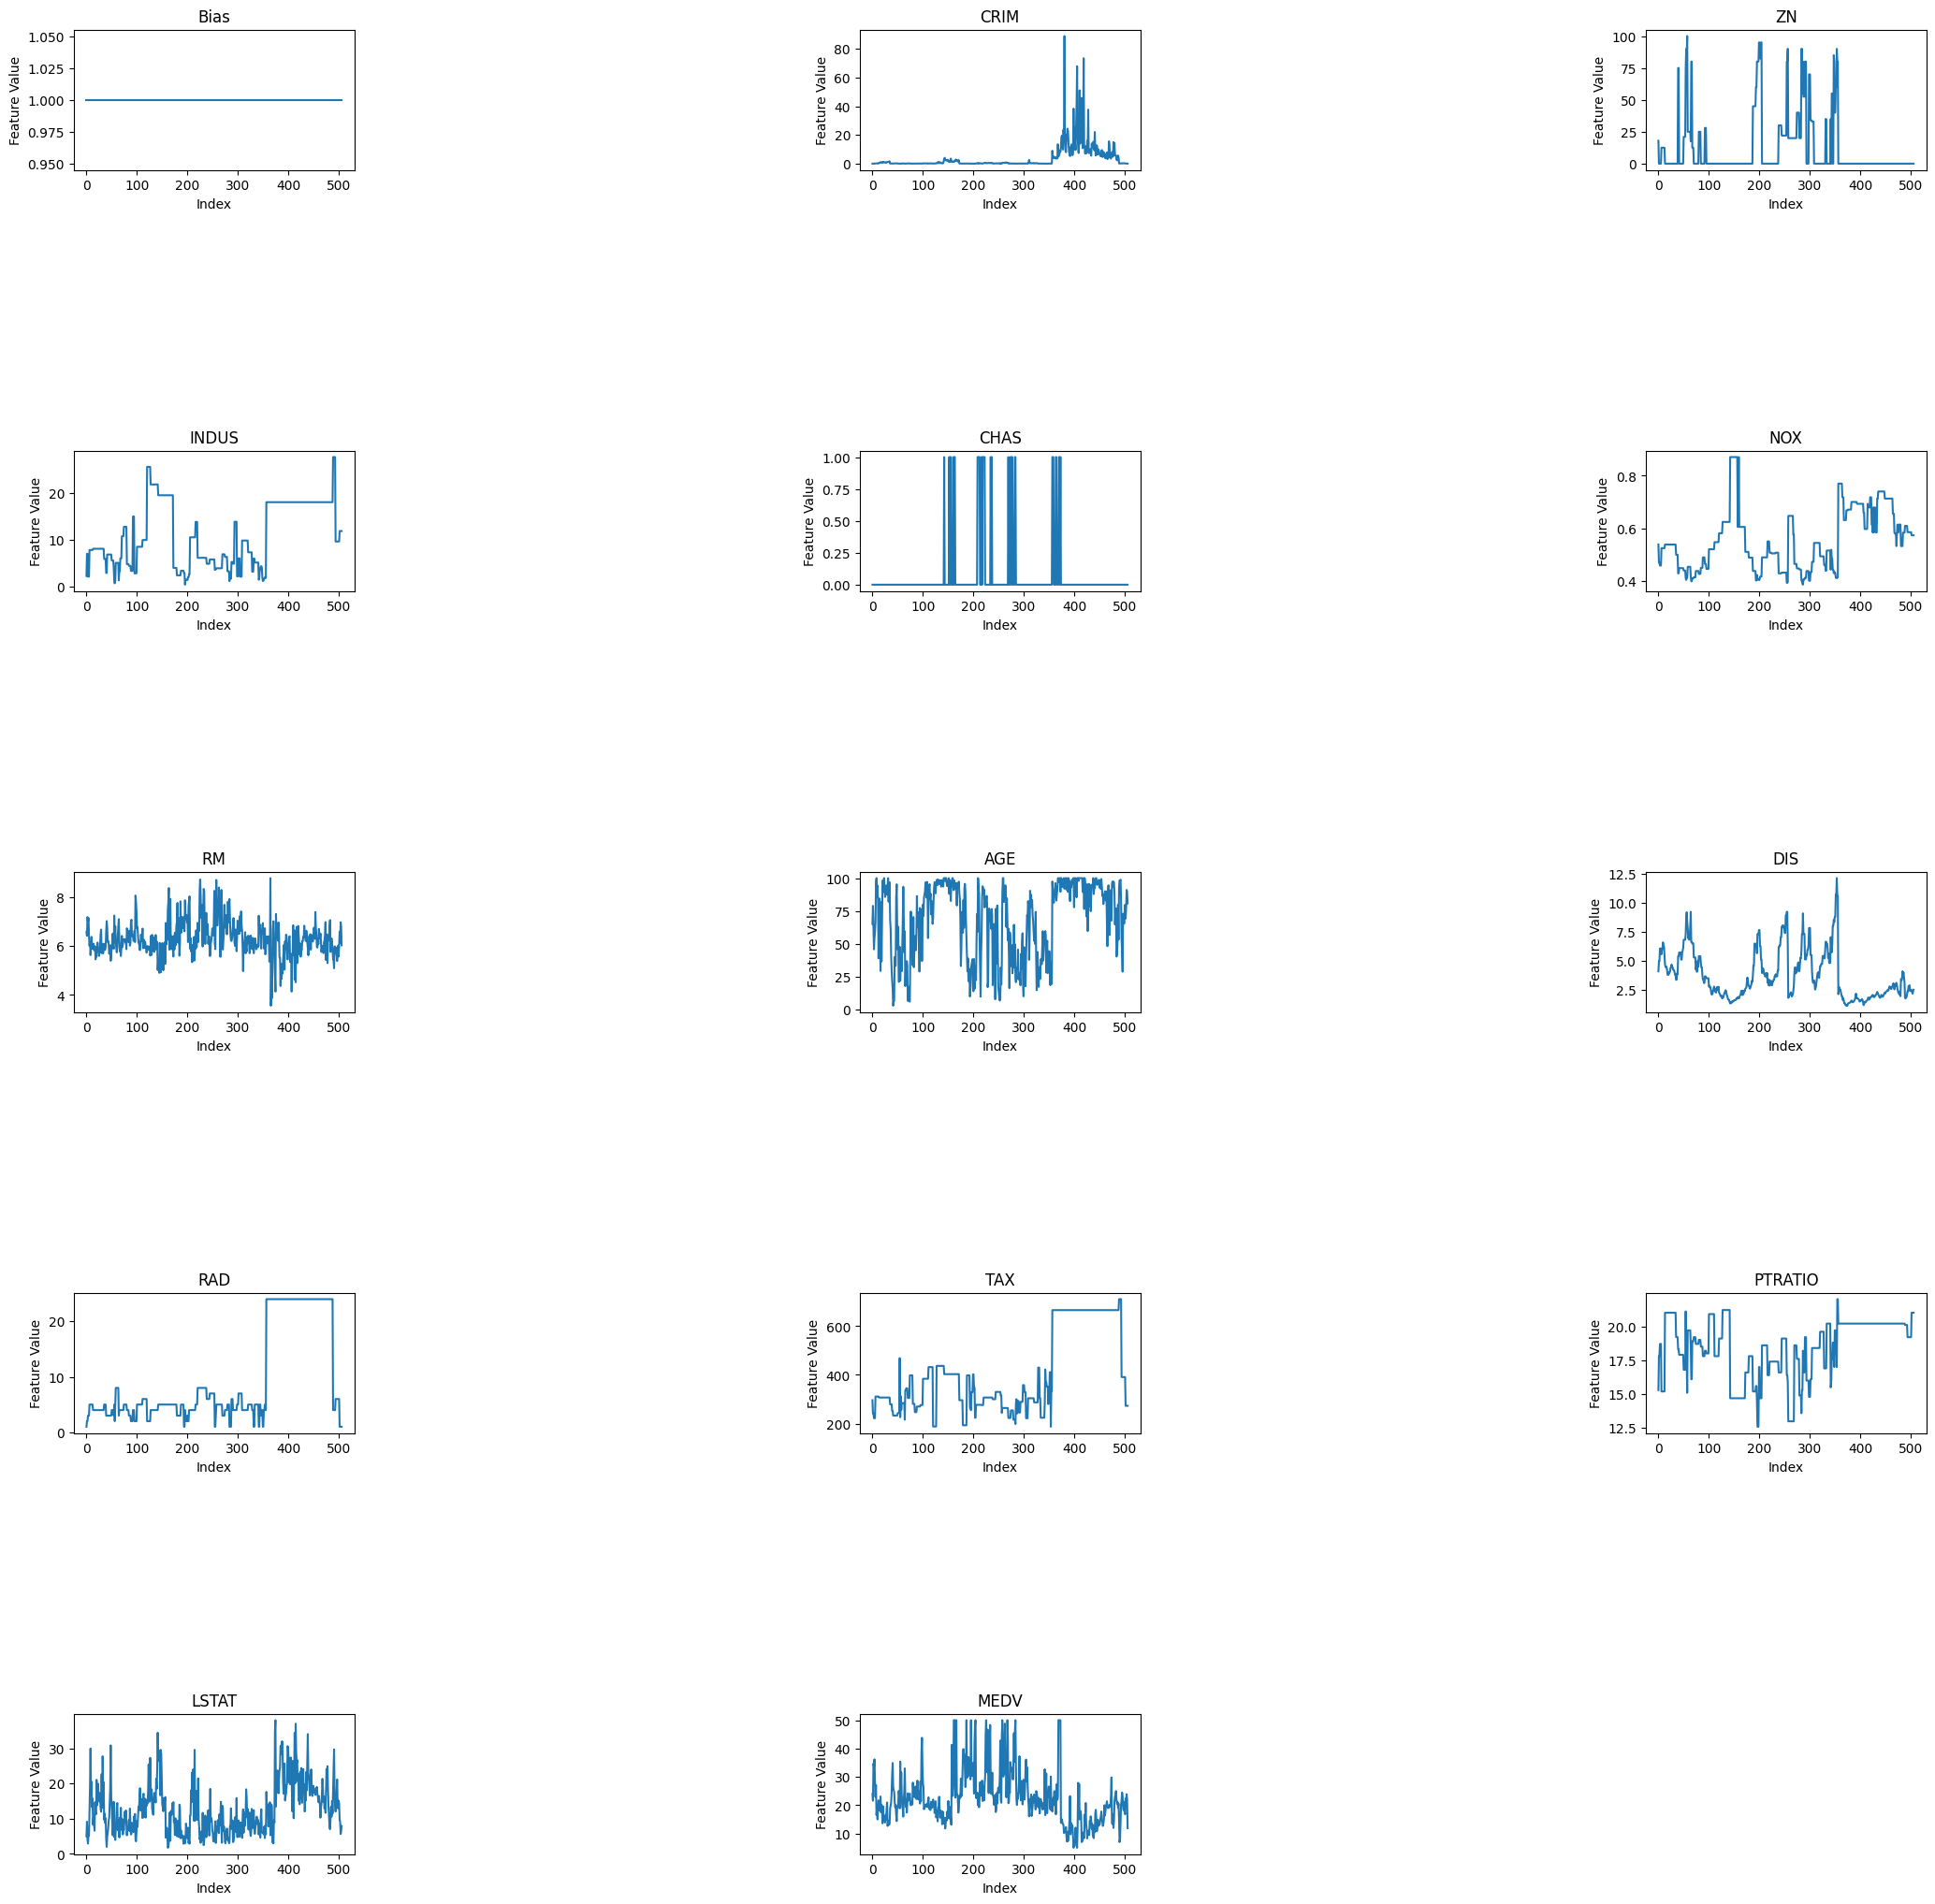

In [13]:
#Task 1 Part 3:
a=[[] for i in range(len(cleaneddb.columns))]

for i in range(len(cleaneddb.columns)):
  arr=[]
  for j in range(len(cleaneddb.index)):
    ele=cleaneddb.iloc[j][i]
    arr.append(ele)
  a[i]=arr

plt.rcParams["figure.figsize"] = [30,30]

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=2)

for i in range(len(a)):
  plt.subplot(6, 6, 2*i+1)
  plt.plot(range(len(cleaneddb.index)), a[i])
  plt.xlabel("Index")
  plt.ylabel("Feature Value")
  feature=str(cleaneddb.columns[i])
  plt.title(feature)
  

C:\Users\Shiyan Liu\AppData\Local\Temp\ipykernel_13836\3146413547.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ele=winefeatures.iloc[j][i]


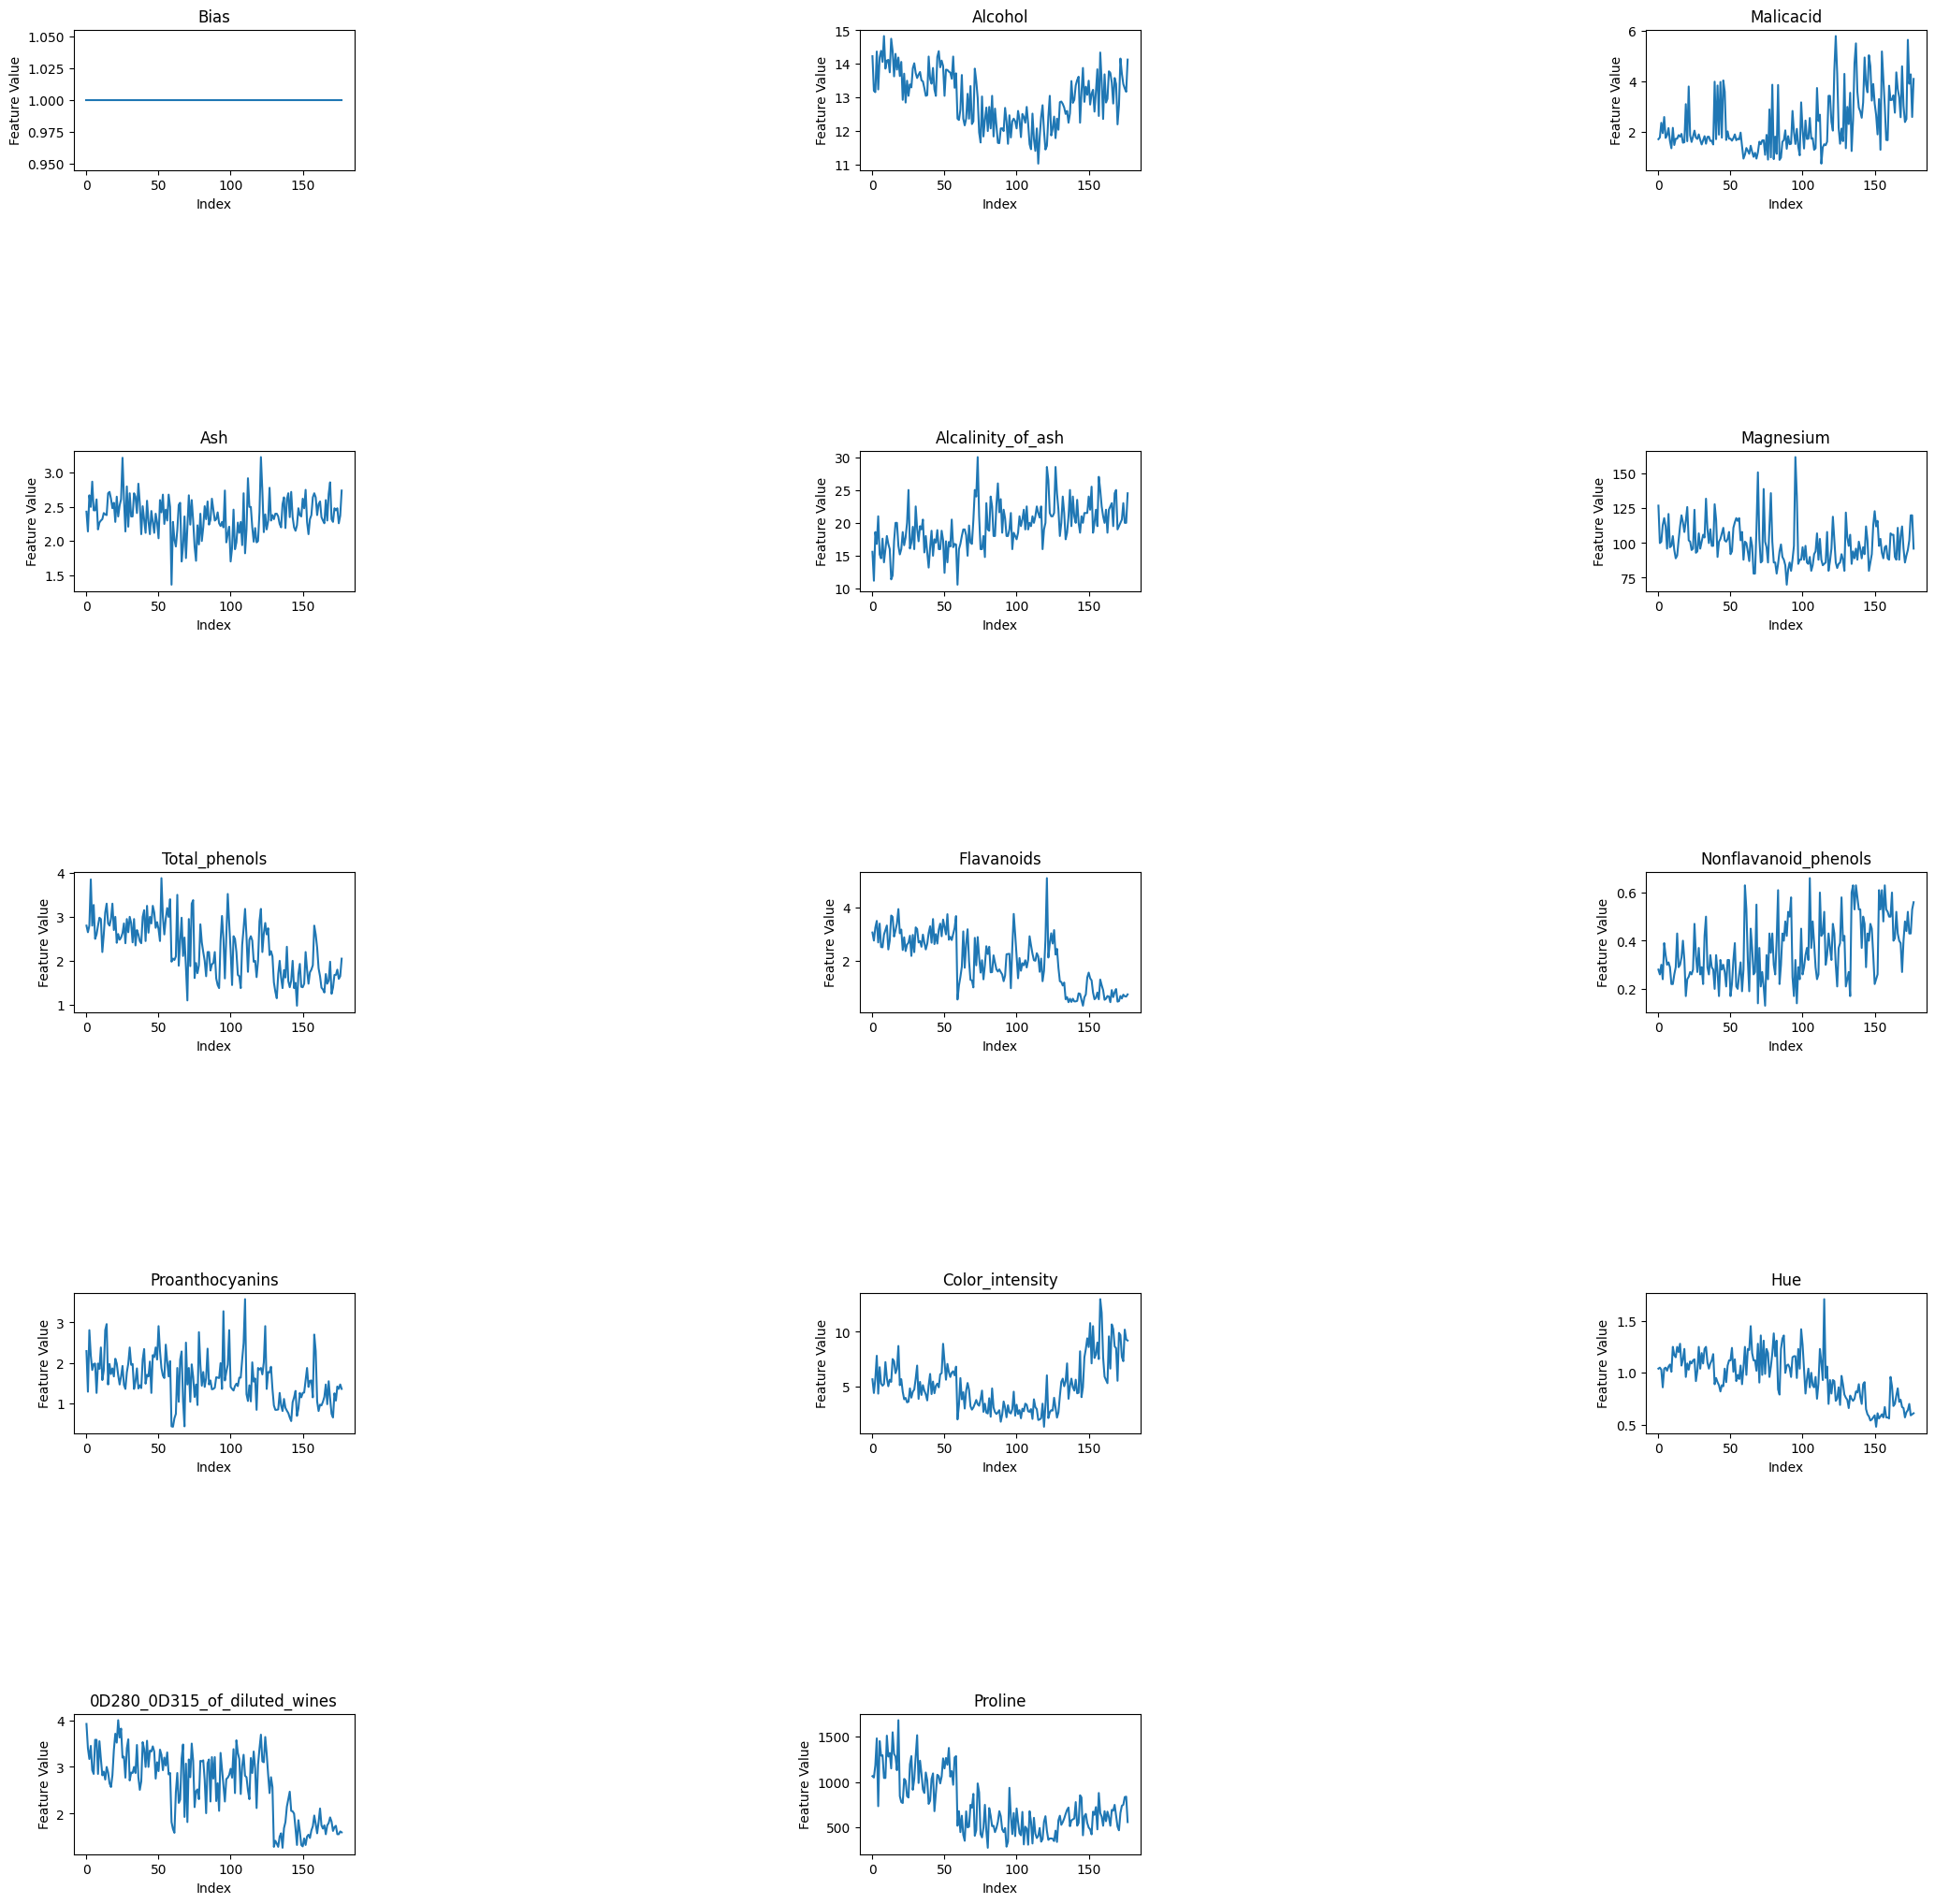

In [14]:
b=[[] for i in range(len(winefeatures.columns))]

for i in range(len(winefeatures.columns)):
  arr=[]
  for j in range(len(winefeatures.index)):
    ele=winefeatures.iloc[j][i]
    arr.append(ele)
  b[i]=arr
  
plt.rcParams["figure.figsize"] = [30,30]

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=2)

for i in range(len(b)):
  plt.subplot(6, 6, 2*i+1)
  plt.plot(range(len(winefeatures.index)), b[i])
  plt.xlabel("Index")
  plt.ylabel("Feature Value")
  feature=str(winefeatures.columns[i])
  plt.title(feature)

In [15]:
#Part 2, Task 1

class LinReg(object):
  def __init__(self, X, Y, miniBatch=0):
    self.X=X
    self.Y=Y
    self.w=None
    self.miniBatch=miniBatch
    
  def fitlinear(self):
    Xmatrix=self.X
    XT=np.transpose(self.X)
    inv=np.linalg.inv(np.matmul(XT, Xmatrix))
    a=np.matmul(XT, self.Y)
    self.w=np.matmul(inv, a)

  def fitlogistic(self, eps, alpha):
    lr=alpha
    #w=[-1]*len(self.X[0])
    w=[0]*len(self.X[0])
    n=0
    while 1:
        gradient=self.gradient(self.X, w)
        if np.linalg.norm(gradient)<eps or n>10000:
            break
        for d in range(len(w)):
            #w[d]-=lr*gradient[d]
            w[d]-=lr*gradient[d]
        n+=1
    self.w=w
  
  def fitlogisticmomentum(self, eps, alpha, beta):
    lr=alpha
    b=beta
    #w=[-1]*len(self.X[0])
    w=[0]*len(self.X[0])
    deltaw=[0]*len(self.X[0])
    n=0
    while 1:
        gradient=self.gradient(self.X, w)
        if np.linalg.norm(gradient)<eps or n>10000:
            break
        for d in range(len(w)):
            deltaw[d]=b*deltaw[d]+(1-b)*gradient[d]
            w[d]-=lr*deltaw[d]
        n+=1
    self.w=w            
    
  def gradient(self, X, w):
    gradient=[0]*len(self.X[0]) #D length vector
    if self.miniBatch!=0:
      indices=randindices(self.X, self.miniBatch)
      batch=self.batch(indices)
      yhat=np.matmul(batch, w)
      y=[self.Y[ele] for ele in indices]
      yhminusy=[yhat[b]-y[b] for b in range(len(y))]
      gradient=(1/self.miniBatch)*np.matmul(np.transpose(batch),yhminusy)
    else:
      yhat=np.matmul(X, w)
      yhminusy=[yhat[b]-self.Y[b] for b in range(len(self.Y))]
      N=len(self.Y)
      gradient=(1/N)*np.matmul(np.transpose(self.X),yhminusy)
    return gradient

  def batch(self, randindices):
    batch=[self.X[ele] for ele in randindices]
    return batch

  def getMSE(self, Xtest, Ytest):
      Ypredicted=self.predictlinear(Xtest)
      Yhminusy=np.subtract(Ypredicted, Ytest)
      return ((np.linalg.norm(Yhminusy))**2)*(1/2)/len(Ytest)
      
  def predictlinear(self, X):
    return np.matmul(X, self.w)
  

In [16]:
class LogReg(object):

    #w=[[w1],[w2],[w3]]
    def __init__(self, X, Y, miniBatch=0):
        self.X=X
        self.Y=Y
        self.miniBatch=miniBatch
        self.numClasses=max(Y)
        self.numFeatures=len(X[0])
        self.w=None
        
    def gradient(self, X, Y, w):
        N=len(Y) #Number of data samples
        gradient=[[0]*self.numFeatures for i in range(self.numClasses)]
        if self.miniBatch==0:
            for c in range(self.numClasses):
                for d in range(self.numFeatures):
                    gradient[c][d]=self.gradientsum(c, d, X, Y, w)
        else:
            indices=randindices(self.X, self.miniBatch)
            batch=self.batch(indices)
            Ybatch=[self.Y[ele] for ele in indices]
            for c in range(self.numClasses):
                for d in range(self.numFeatures):
                    gradient[c][d]=self.gradientsum(c,d, batch, Ybatch, w)
        return gradient
            
    def gradientsum(self, c, d, X, Y, w):
        wvec=w[c]
        ans=0
        for n in range(len(Y)):
            xnd=X[n][d]
            x=X[n]
            zc=[np.dot(w[i], x) for i in range(self.numClasses)]
            maxzc=max(zc)
            zc=[np.exp(zc[i]-maxzc) for i in range(len(zc))]
            logyhat=np.dot(w[c],x)-maxzc-np.log(np.sum(zc))
            yn=1 if Y[n]==c+1 else 0
            ans+=(np.exp(logyhat)-yn)*(xnd)
        return ans 

    def batch(self, randindices):
        batch=[self.X[ele] for ele in randindices]
        return batch
        
    def fit(self, eps, alpha=0.01, power=1):
        lr=alpha
        omega=[[0]*self.numFeatures for i in range(self.numClasses)]
        n=0
        while 1:
            self.w=omega
            n+=1
            gradient=self.gradient(self.X,self.Y,omega) #DxC matrix
            g=[]
            for i in range(len(gradient)):
                g+=gradient[i]
            if np.linalg.norm(g)<eps or n>200:
                """print(g)
                print(self.w)"""
                break
            for i in range(len(omega)):
                for j in range(len(omega[i])):
                    omega[i][j]-=lr*gradient[i][j]
            lr=lr/(n**power+1)
        self.w=omega
        return self.w

    def fitmomentum(self, eps, beta, alpha=0, power=1):
        lr=alpha if alpha!=0 else 1
        b=beta
        omega=[[0]*self.numFeatures for i in range(self.numClasses)]
        deltaw=[[0]*self.numFeatures for i in range(self.numClasses)]
        n=0
        while 1:
            self.w=omega
            n+=1
            gradient=self.gradient(self.X,self.Y,omega) #DxC matrix
            g=[]
            for i in range(len(gradient)):
                g+=gradient[i]
            if np.linalg.norm(g)<eps or n>1000:
                """print(g)
                print(self.w)"""
                break
            for i in range(len(omega)):
                for j in range(len(omega[i])):
                    deltaw[i][j]=b*deltaw[i][j]+(1-b)*gradient[i][j]
                    omega[i][j]-=lr*deltaw[i][j]
            lr=lr/(n**power+1)
        self.w=omega
        return self.w
    def getLoss(self, Xtest, Ytest):
        if self.w==None:
            return None
        else:
            ans=0
            for n in range(len(Ytest)):
                xn=Xtest[n]
                zc=[np.dot(self.w[c], xn) for c in range(self.numClasses)]
                yn=[0]*self.numClasses
                yn[Ytest[n]-1]=1
                maxzc=np.max(zc)
                exponents=[np.exp(zc[i]-maxzc) for i in range(len(zc))]
                ans+=np.dot(yn, zc)-maxzc-np.log(np.sum(exponents))
            return ans/len(Ytest)

    def getMetrics(self, Xtest, Ytest):
        Ypredicted=[self.predict(Xtest[i]) for i in range(len(Xtest))]
        counts=[{"TP": 0, "TN": 0, "FP": 0, "FN": 0} for i in range(self.numClasses)]
        metrics=[{"accuracy": 0, "precision": 0, "recall": 0, "f1": 0} for i in range(self.numClasses)]
        for c in range(self.numClasses):
            for i in range(len(Ypredicted)):
                Yactual=Ytest[i]
                if Ypredicted[i]==Yactual and Yactual==c+1:
                    counts[c-1]["TP"]+=1
                elif Ypredicted[i]==Yactual and Yactual!=c+1:
                    counts[c-1]["TN"]+=1
                elif Ypredicted[i]!=c+1 and Yactual==c+1:
                    counts[c-1]["FN"]+=1
                elif Ypredicted[i]==c+1 and Yactual!=c+1:
                    counts[c-1]["FP"]+=1
        for c in range(self.numClasses):
            TP=counts[c]["TP"]
            TN=counts[c]["TN"]
            FP=counts[c]["FP"]
            FN=counts[c]["FN"]
            P=TP+FN
            N=TN+FP
            RP=TP+FP
            RN=FN+TN
            metrics[c]["accuracy"]=(TP+TN)/(P+N)
            metrics[c]["precision"]=TP/RP
            metrics[c]["recall"]=TP/P
            metrics[c]["f1"]=(metrics[c]["precision"]*metrics[c]["recall"])*2/(metrics[c]["precision"]+metrics[c]["recall"])
        return metrics
        
    def predict(self, x):
        if self.w==None:
            return None
        else:
            prob=0
            ans=0
            for i in range(self.numClasses):
                probc=np.dot(self.w[i],x)
                if probc>prob:
                    ans=i+1
            return ans
        

In [17]:
#Task 3 Part 1

X=copy.deepcopy(cleaneddbnp)

Y=copy.deepcopy(cleaneddbtargets)

cutoff=int(np.floor(0.8*len(X)))
Xtraining=X[:cutoff]
Xtest=X[cutoff+1:]
Ytraining=Y[:cutoff]
Ytest=Y[cutoff+1:]

linearregression=LinReg(Xtraining,Ytraining, len(Xtraining))
linearregression.fitlinear()

print("Analytical loss is:", linearregression.getMSE(Xtest, Ytest))
      
mblinearregression=LinReg(Xtraining,Ytraining, len(Xtraining))
mblinearregression.fitlogistic(0.01, 0.01)

print("SGD loss is:", mblinearregression.getMSE(Xtest, Ytest))

X=copy.deepcopy(winefeaturesnp)

#Need to transform any new data in the same

Y=copy.deepcopy(winetargets)

cutoff=int(np.floor(0.8*len(X)))
indices=randindices(X, cutoff)
Xtraining=[X[ele] for ele in indices]
Xtest=[X[ele] for ele in range(len(X)) if ele not in indices]
Ytraining=[Y[ele] for ele in indices]
Ytest=[Y[ele] for ele in range(len(Y)) if ele not in indices]

logisticregression=LogReg(Xtraining,Ytraining, 64)
logisticregression.fit(0.01, 0.001)

print("Metrics are:")
logisticregression.getMetrics(Xtest, Ytest)

Analytical loss is: 9.74139599103219e-29
SGD loss is: 0.000950463018459937
Metrics are:


[{'accuracy': 0.8333333333333334,
  'precision': 0.8571428571428571,
  'recall': 0.75,
  'f1': 0.7999999999999999},
 {'accuracy': 0.8823529411764706,
  'precision': 0.6666666666666666,
  'recall': 1.0,
  'f1': 0.8},
 {'accuracy': 0.9375,
  'precision': 1.0,
  'recall': 0.8333333333333334,
  'f1': 0.9090909090909091}]

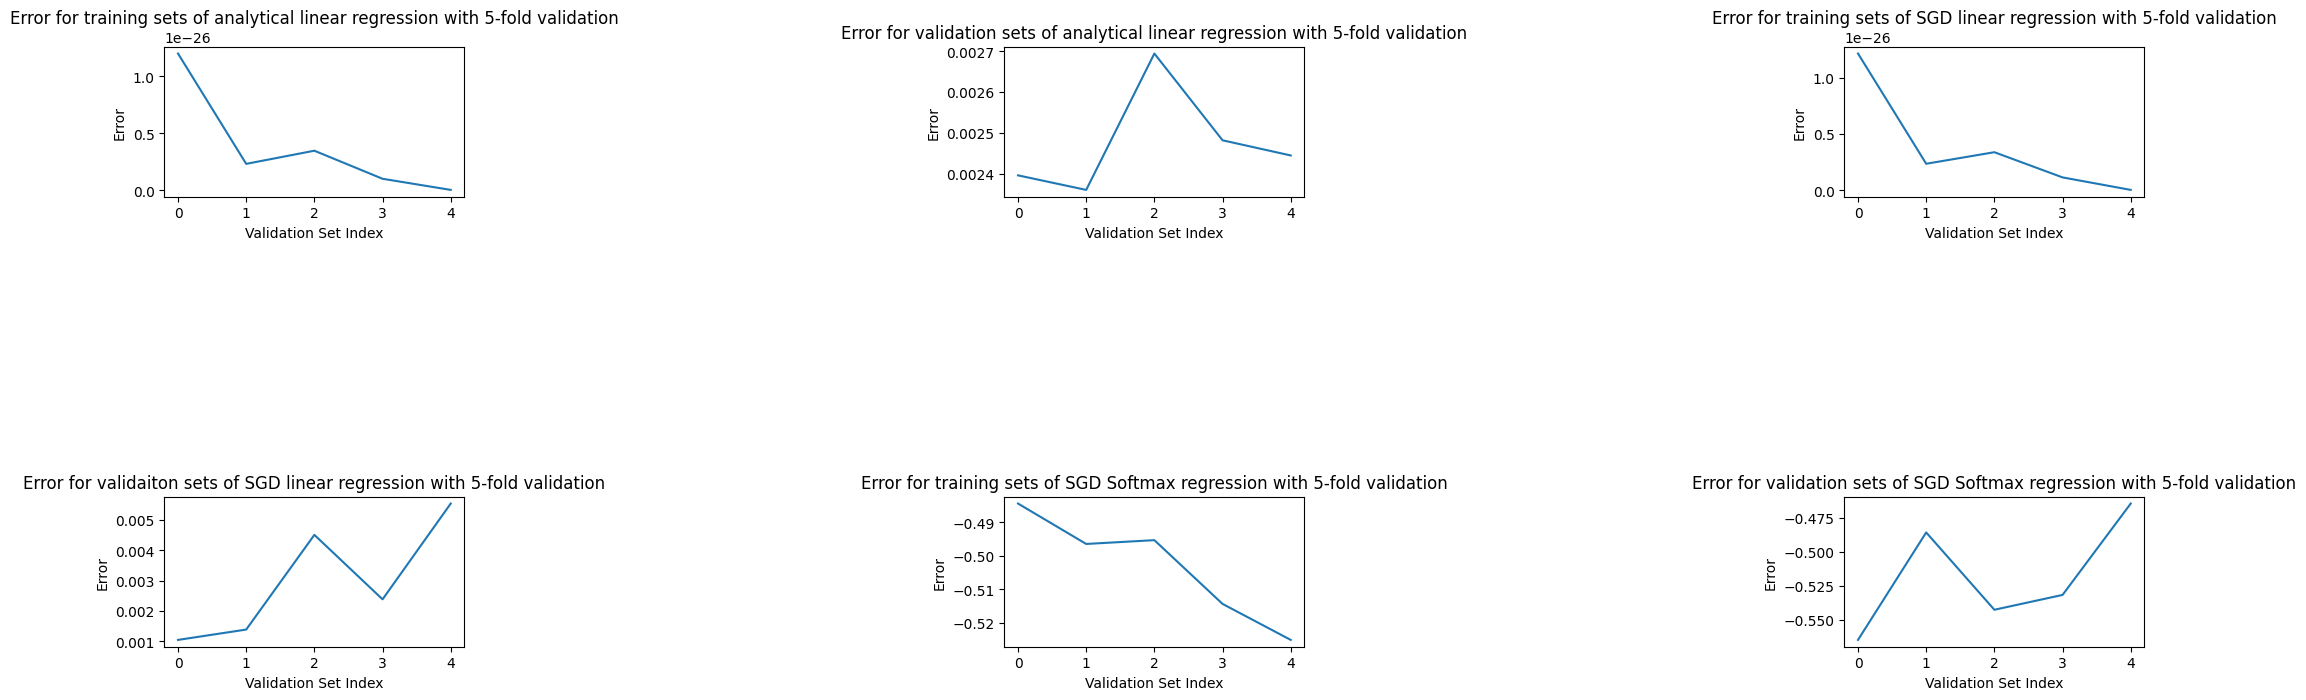

In [18]:
#Task 3 Part 2

def partitionindices(array, Nfold):
    indices = np.arange(len(array))
    np.random.shuffle(indices)

    foldsize=len(array)//Nfold
    partitions=[]

    for i in range(Nfold):
        start=i*foldsize
        end=(i+1)*foldsize if i<Nfold-1 else None
        partitionindices=indices[start:end]
        partitions.append(partitionindices)

    return partitions
    
Nfold=5

partitionedindices=partitionindices(winefeaturesnp, 5)
        
linregerrortraining=[]
lingregwsgderrortraining=[]
linregerrorvalidation=[]
linregwsgderrorvalidation=[]

for n in range(Nfold):
    Xtraining=[]
    Ytraining=[]
    for i in range(len(partitionedindices)):
        if i!=n:
            for index in partitionedindices[i]:
                Xtraining.append(cleaneddbnp[index])
                Ytraining.append(cleaneddbtargets[index])
    Xvalidation=[cleaneddbnp[index] for index in partitionedindices[n]]
    Yvalidation=[cleaneddbtargets[index] for index in partitionedindices[n]]
    
    linreg=LinReg(Xtraining,Ytraining)
    linreg.fitlinear()
    linregerrortraining.append(linreg.getMSE(Xtraining, Ytraining))
    linregerrorvalidation.append(linreg.getMSE(Xvalidation, Yvalidation))
    
    linregwsgd=LinReg(Xtraining,Ytraining, 128)
    linregwsgd.fitlogistic(0.01, 0.01)
    lingregwsgderrortraining.append(linregwsgd.getMSE(Xtraining, Ytraining))
    linregwsgderrorvalidation.append(linregwsgd.getMSE(Xvalidation, Yvalidation))
    

#I don't think I can divide equally in this case, since they're all in order of class 1, 2, 3.
partitionedindices=partitionindices(winefeaturesnp, 5)
        
logregerrortraining=[]
logregerrorvalidation=[]
for n in range(Nfold):
    Xtraining=[]
    Ytraining=[]
    for i in range(len(partitionedindices)):
        if i!=n:
            for index in partitionedindices[i]:
                Xtraining.append(winefeaturesnp[index])
                Ytraining.append(winetargets[index])
    Xvalidation=[winefeaturesnp[index] for index in partitionedindices[n]]
    Yvalidation=[winetargets[index] for index in partitionedindices[n]]

    logreg=LogReg(Xtraining,Ytraining, 32)
    logreg.fit(0.01, 0.01, 1)
    logregerrortraining.append(logreg.getLoss(Xtraining, Ytraining))
    logregerrorvalidation.append(logreg.getLoss(Xvalidation, Yvalidation))
    
errors=[linregerrortraining, lingregwsgderrortraining, linregerrorvalidation, linregwsgderrorvalidation, 
        logregerrortraining, logregerrorvalidation]
titles=["Error for training sets of analytical linear regression with 5-fold validation", 
        "Error for validation sets of analytical linear regression with 5-fold validation", 
        "Error for training sets of SGD linear regression with 5-fold validation", 
        "Error for validaiton sets of SGD linear regression with 5-fold validation", 
        "Error for training sets of SGD Softmax regression with 5-fold validation", 
        "Error for validation sets of SGD Softmax regression with 5-fold validation"]

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=2)

for i in range(len(errors)):
    plt.subplot(6, 6, 2*i+1)
    plt.plot(range(len(errors[i])), errors[i])
    plt.ylabel("Error")
    plt.xlabel("Validation Set Index")
    plt.title(titles[i])

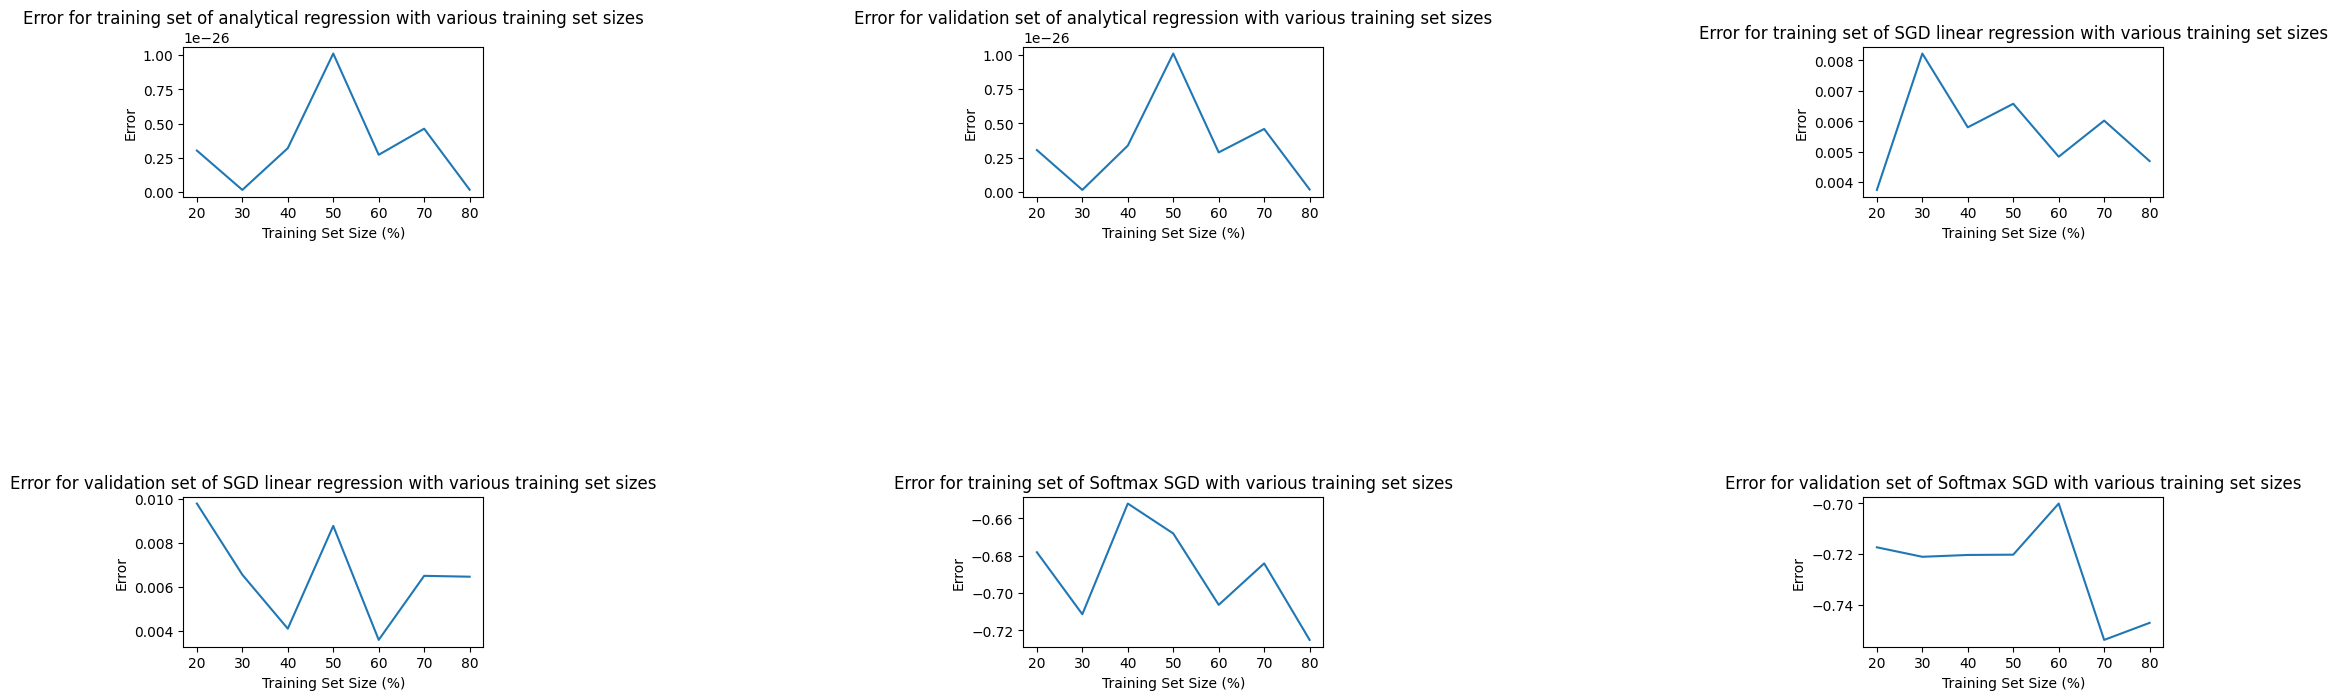

In [19]:
#Task 3 Part 3:
partitionedindices=partitionindices(cleaneddbnp, 10)

linregerrortraining=[]
linregwsgderrortraining=[]
logregerrortraining=[]
linregerrorvalidation=[]
linregwsgderrorvalidation=[]
logregerrorvalidation=[]

errors=[linregerrortraining, linregerrorvalidation, linregwsgderrortraining, linregwsgderrorvalidation, 
        logregerrortraining,logregerrorvalidation]

percentages=[20, 30, 40, 50, 60, 70, 80]

for Nfold in range(2, 9):
    sample=rand.sample(range(len(partitionedindices)), Nfold)
    included=[partitionedindices[i] for i in sample]
    notincluded=[partitionedindices[i] for i in range(len(partitionedindices)) if i not in sample]
    Xtraining=[]
    Ytraining=[]
    Xvalidation=[]
    Yvalidation=[]
    for i in range(len(included)):
        for index in included[i]:
            Xtraining.append(cleaneddbnp[index])
            Ytraining.append(cleaneddbtargets[index])
    for i in range(len(notincluded)):
        for index in notincluded[i]:
            Xvalidation.append(cleaneddbnp[index])
            Yvalidation.append(cleaneddbtargets[index])

    linreg=LinReg(Xtraining,Ytraining)
    linreg.fitlinear()
    linregerrortraining.append(linreg.getMSE(Xtraining, Ytraining))
    linregerrorvalidation.append(linreg.getMSE(Xvalidation, Yvalidation))

    linregwsgd=LinReg(Xtraining,Ytraining, 16)
    linregwsgd.fitlogistic(0.01, 0.01)
    linregwsgderrortraining.append(linregwsgd.getMSE(Xtraining, Ytraining))
    linregwsgderrorvalidation.append(linregwsgd.getMSE(Xvalidation, Yvalidation))

partitionedindices=partitionindices(winefeaturesnp, 10)

for Nfold in range(2, 9):
    sample=rand.sample(range(len(partitionedindices)), Nfold)
    included=[partitionedindices[i] for i in sample]
    notincluded=[partitionedindices[i] for i in range(len(partitionedindices)) if i not in sample]
    Xtraining=[]
    Ytraining=[]
    Xvalidation=[]
    Yvalidation=[]
    for i in range(len(included)):
        for index in included[i]:
            Xtraining.append(winefeaturesnp[index])
            Ytraining.append(winetargets[index])
    for i in range(len(notincluded)):
        for index in notincluded[i]:
            Xvalidation.append(winefeaturesnp[index])
            Yvalidation.append(winetargets[index])

    logreg=LogReg(Xtraining,Ytraining, 16)
    logreg.fit(0.01, 0.01)
    logregerrortraining.append(logreg.getLoss(Xtraining,Ytraining))
    logregerrorvalidation.append(logreg.getLoss(Xvalidation,Yvalidation))

plt.rcParams["figure.figsize"] = [30,30]

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=2)

titles=["Error for training set of analytical regression with various training set sizes",  
        "Error for validation set of analytical regression with various training set sizes", 
        "Error for training set of SGD linear regression with various training set sizes", 
        "Error for validation set of SGD linear regression with various training set sizes", 
        "Error for training set of Softmax SGD with various training set sizes", 
        "Error for validation set of Softmax SGD with various training set sizes"]

for i in range(len(errors)):
  plt.subplot(6, 6, 2*i+1)
  plt.plot(percentages, errors[i])
  plt.xlabel("Training Set Size (%)")
  plt.ylabel("Error")
  plt.title(titles[i])    

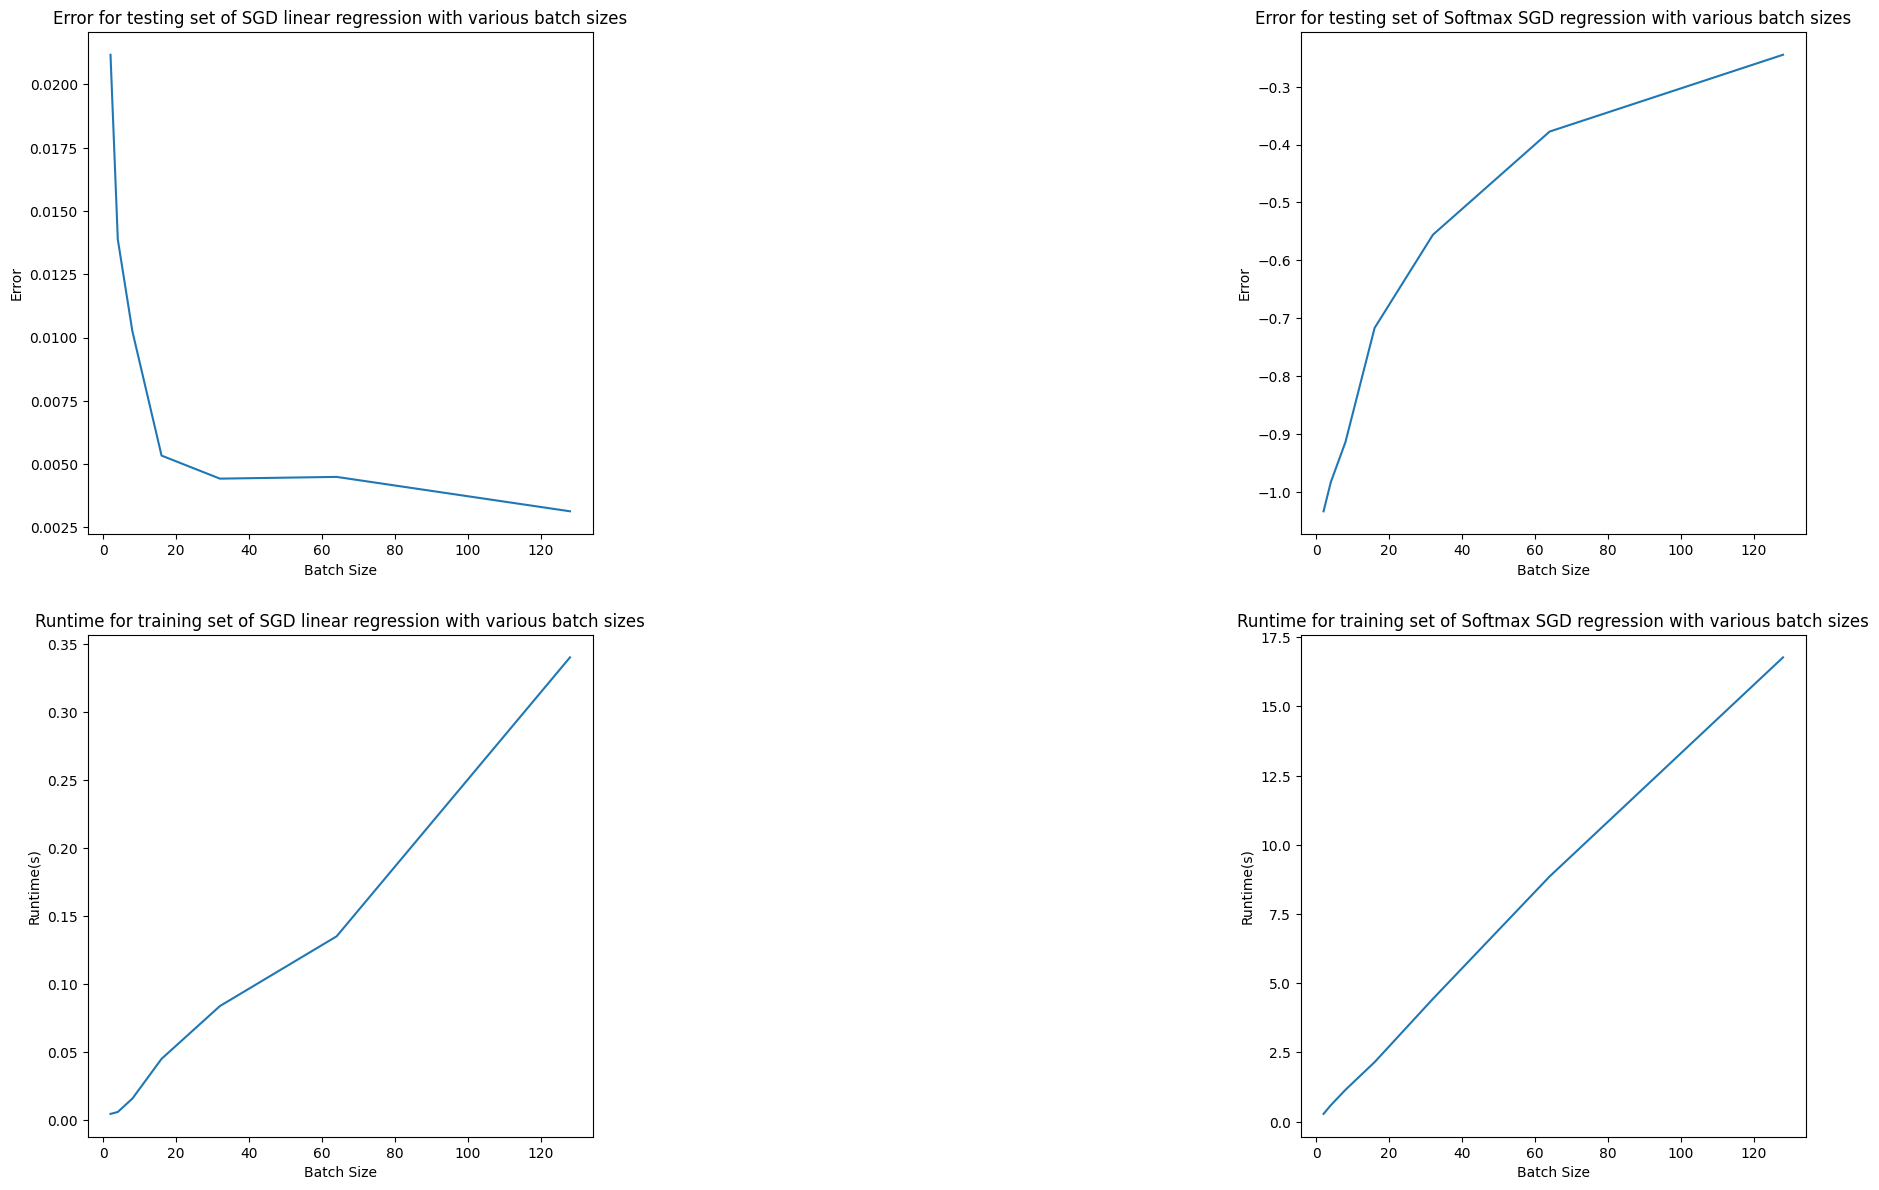

In [20]:
#Task 3 Part 4:

X=copy.deepcopy(cleaneddbnp)
Y=copy.deepcopy(cleaneddbtargets)

linregerror=[]
logregerror=[]
linregruntimes=[]
logregruntimes=[]
errors=[linregerror, logregerror]
runtimes=[linregruntimes,logregruntimes]

Xtraining, Xtest, Ytraining, Ytest=model.train_test_split(X, Y)


for pow in range(1,8):
    linregwsgd=LinReg(Xtraining, Ytraining, 2**pow)
    starttime=time.time()
    linregwsgd.fitlogistic(0.01, 0.01)
    linregerror.append(linregwsgd.getMSE(Xtest,Ytest))
    linregruntimes.append(time.time()-starttime)
    
X=copy.deepcopy(winefeaturesnp)
Y=copy.deepcopy(winetargets)

Xtraining, Xtest, Ytraining, Ytest=model.train_test_split(X, Y)

for pow in range(1,8):
    logreg=LogReg(Xtraining, Ytraining, 2**pow)
    starttime=time.time()
    logreg.fit(0.01, 0.01)
    logregerror.append(logreg.getLoss(Xtest, Ytest))
    logregruntimes.append(time.time()-starttime)
        
batches=[2**i for i in range(1,8)]
errortitles=["Error for testing set of SGD linear regression with various batch sizes",  
    "Error for testing set of Softmax SGD regression with various batch sizes"]
runtimetitles=["Runtime for training set of SGD linear regression with various batch sizes",  
    "Runtime for training set of Softmax SGD regression with various batch sizes"]

for i in range(4):
  if i<2:
    plt.subplot(4, 4, 2*i+1)
    plt.plot(batches, errors[i])
    plt.xlabel("Batch Size")
    plt.ylabel("Error")
    plt.title(errortitles[i]) 
  else:
    plt.subplot(4, 4, 2*i+1)
    plt.plot(batches, runtimes[i%2])
    plt.xlabel("Batch Size")
    plt.ylabel("Runtime(s)")
    plt.title(runtimetitles[i%2])      
   
  


In [21]:
#Task 3 Part 5:

X=copy.deepcopy(cleaneddbnp)
Y=copy.deepcopy(cleaneddbtargets)

Xtraining, Xtest, Ytraining, Ytest=model.train_test_split(X, Y)
linregruntimes=[]
linregerrors=[]
logregerrors=[]
logregruntimes=[]

errors=[linregerrors, logregerrors]
runtimes=[linregruntimes, logregruntimes]
for pow in range(-2, -5, -1):
    linregwsgd=LinReg(Xtraining, Ytraining)
    starttime=time.time()
    alpha=10**pow
    linregwsgd.fitlogistic(0.01, alpha)
    linregerrors.append(linregwsgd.getMSE(Xtest,Ytest))
    linregruntimes.append(time.time()-starttime)
    
X=copy.deepcopy(winefeaturesnp)
Y=copy.deepcopy(winetargets)

Xtraining, Xtest, Ytraining, Ytest=model.train_test_split(X, Y)
for pow in range(-2,-5, -1):
    logreg=LogReg(Xtraining, Ytraining, 64)
    starttime=time.time()
    alpha=10**pow
    logreg.fit(0.01, alpha)
    logregerrors.append(logreg.getLoss(Xtest,Ytest))
    logregruntimes.append(time.time()-starttime)

powers=[i for i in range(-2,-5,-1)]
errortitles=["Error for testing set of SGD linear regression with various initial learning rates",  
    "Error for testing set of Softmax SGD regression with various initial learning rates"]
runtimetitles=["Runtime for testing set of SGD linear regression with various initial learning rates",  
    "Runtime for testing set of Softmax SGD regression with various initial learning rates"]

for i in range(4):
  if i<2:
    plt.subplot(4, 4, 2*i+1)
    plt.plot(powers, errors[i])
    plt.xlabel("Initial Alpha (e-10)")
    plt.ylabel("Error")
    plt.title(errortitles[i]) 
  else:
    plt.subplot(4, 4, 2*i+1)
    plt.plot(powers, runtimes[i%2])
    plt.xlabel("Initial Alpha (e-10)")
    plt.ylabel("Runtime(s)")
    plt.title(runtimetitles[i%2])

KeyboardInterrupt: 

In [ ]:
#Task 3 Part 6:

"""For linear regression, the analytical solution has no real optimal paramters, since it's analytical by nature. For the logistic regression,
I'm going to take a mix of eps and the alpha, and I'm going to choose the loss function, (MSE) as our parameter. I'm choosing this 
because our analytical solution gives a loss function of around e-27, which is exactly what you would expect for the analytical solution. As such, 
I'm going to choose the parameters that gets me closest to the smallest loss function."""

X=copy.deepcopy(cleaneddbnp)
Y=copy.deepcopy(cleaneddbtargets)
optimalparameters=None
minloss=float('inf')

Xtraining, Xtest, Ytraining, Ytest=model.train_test_split(X, Y)
for epspow in range(-1, -4, -1):
    for lrpow in range(-1, -4, -1):

        linregwsgd=LinReg(Xtraining, Ytraining)
        eps=10**epspow
        alpha=10**lrpow
        linregwsgd.fitlogistic(eps, alpha)
        error=linregwsgd.getMSE(Xtest,Ytest)
        if error<minloss:
            minloss=error
            optimalparameters=[10**epspow, 10**lrpow]
        print("Error for eps of %f, with learning rate of %f, is %f" % (10**epspow, 10**lrpow, error))
        
print("Optimal parameters are an epsilon of %f and a learning rate of %f" %(optimalparameters[0], optimalparameters[1]))        

"""For the logistic regression, the two important things are the batch size, since too large of a batch size will make it not converge, and decay rate 
of learning rate, since it also won't converge if this isn't tuned properly. For the performance metric, we're going to take the recall of each class, 
since for a softmax classification, we really want to know that if we PREDICT something to be of class c, what is the the probability that it 
actually IS of class C, and we'll be taking the average recall across the different classes. """

X=copy.deepcopy(winefeaturesnp)
Y=copy.deepcopy(winetargets)
optimalparameters=None
maxrecall=0

Xtraining, Xtest, Ytraining, Ytest=model.train_test_split(X, Y)
for batchpow in range(1,7):
    for lrpow in range(1,3):
        logreg=LogReg(Xtraining, Ytraining, 2**batchpow)
        logreg.fit(0.01, 0.01, lrpow)
        print("Error for batch size of %d, with alpha decay rate of 1/(n**%d+1), is %f" % (2**batchpow, lrpow, logreg.getLoss(X,Y)))
        averagerecall=0
        for metricdict in logreg.getMetrics(Xtest,Ytest):
            numClasses=logreg.numClasses
            averagerecall+=metricdict["recall"]/numClasses
        if averagerecall>maxrecall:
            maxrecall=averagerecall
            optimalparameters=[2**batchpow, lrpow]
        print("Average recall for batch size of %d, with alpha decay rate of 1/(n**%d+1), is %f" % (2**batchpow, lrpow, averagerecall))
        
print("Optimal parameters are a batch size of %d, and an alpha decay rate of %d" % (optimalparameters[0], optimalparameters[1]))

Error for eps of 0.100000, with learning rate of 0.100000, is 0.014675
Error for eps of 0.100000, with learning rate of 0.010000, is 0.014860
Error for eps of 0.100000, with learning rate of 0.001000, is 0.014815
Error for eps of 0.010000, with learning rate of 0.100000, is 0.001899
Error for eps of 0.010000, with learning rate of 0.010000, is 0.001903
Error for eps of 0.010000, with learning rate of 0.001000, is 0.003968
Error for eps of 0.001000, with learning rate of 0.100000, is 0.000119
Error for eps of 0.001000, with learning rate of 0.010000, is 0.000325
Error for eps of 0.001000, with learning rate of 0.001000, is 0.003968
Optimal parameters are an epsilon of 0.001000 and a learning rate of 0.100000
Error for batch size of 2, with alpha decay rate of 1/(n**1+1), is -0.117281
Average recall for batch size of 2, with alpha decay rate of 1/(n**1+1), is 0.892673
Error for batch size of 2, with alpha decay rate of 1/(n**2+1), is -0.310059
Average recall for batch size of 2, with alp

Average difference between dataset with 5 Gaussian features and the unchanged one is 0.119148
Average difference between dataset with 6 Gaussian features and the unchanged one is 0.108850
Average difference between dataset with 7 Gaussian features and the unchanged one is 0.135405
Average difference between dataset with 8 Gaussian features and the unchanged one is 0.084158
Average difference between dataset with 9 Gaussian features and the unchanged one is 0.097693
Average difference between dataset with 10 Gaussian features and the unchanged one is 0.100063
Average difference between dataset with 11 Gaussian features and the unchanged one is 0.093907
Average difference between dataset with 12 Gaussian features and the unchanged one is 0.093780
Average difference between dataset with 13 Gaussian features and the unchanged one is 0.102660


Text(0.5, 1.0, 'Average difference between gaussian predicted values and original values with various gaussian features')

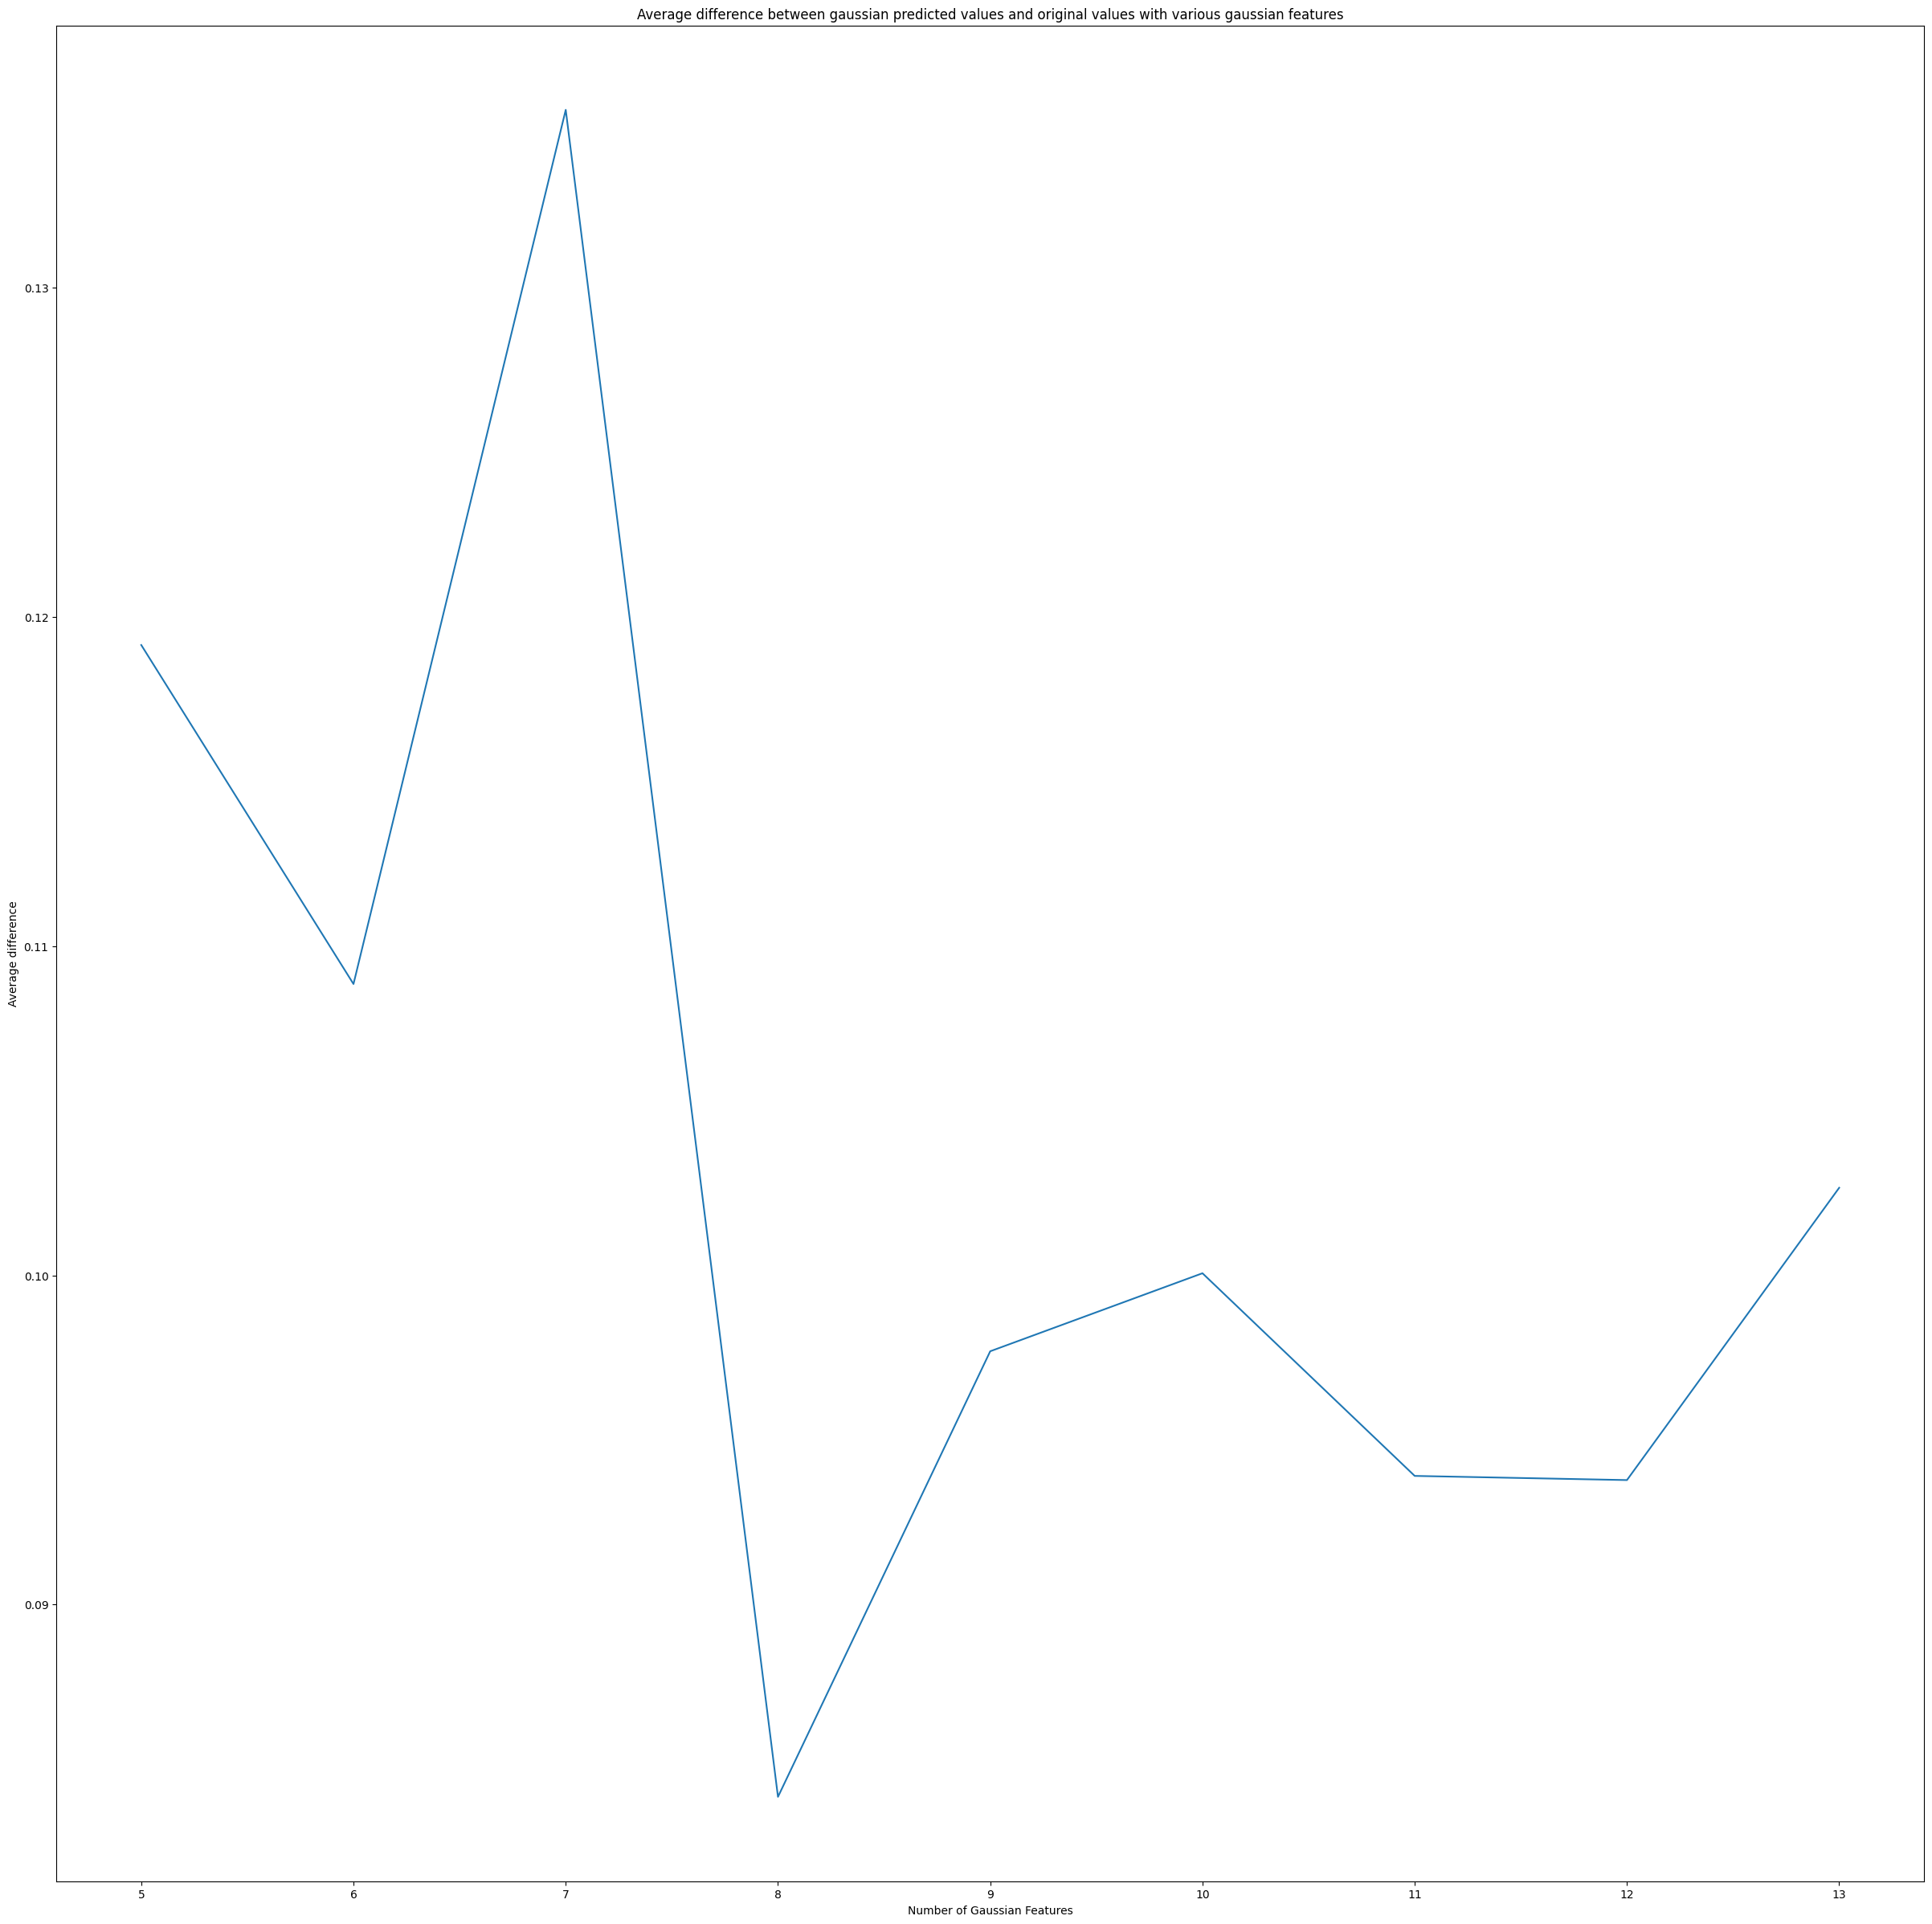

In [ ]:
#Task 3 Part 7 

#Using the first half to train, and the second half to test.

def gaussian(x, mu, s):
    return np.exp(-((x-mu)**2)/(2*s**2))
    
X=copy.deepcopy(cleaneddbnp)
Y=copy.deepcopy(cleaneddbtargets)
end=len(X[0])-1

averagedif=[]

for numGaussians in range(5, len(X[0])):
    indexrange=range(1, len(X[0]))
    indices=rand.sample(indexrange, numGaussians)+[0]

    for columnnum in indices:
        averagex=np.average(column(X, columnnum))
        stdx=np.std(column(X, columnnum))
        for n in range(len(X)):
            X[n][columnnum]=gaussian(X[n][columnnum], averagex, stdx) if stdx!=0 else X[n][columnnum]

    Xgaussian=[[0]*len(indices) for i in range(len(X))]

    for i in range(len(Xgaussian)):
        for j in range(len(indices)):
            Xgaussian[i][j]=X[i][indices[j]]
    
    Xtraining, Xtest, Ytraining, Ytest=model.train_test_split(Xgaussian, Y)
    gaussianlinreg=LinReg(Xtraining,Ytraining)
    gaussianlinreg.fitlinear()

    err=gaussianlinreg.getMSE(Xtest, Ytest)
    difference=[abs(gaussianlinreg.predictlinear(Xtest)[i]-Ytest[i]) for i in range(len(Ytest))]
    averagedif.append(np.average(difference))
    print("Average difference between dataset with %d Gaussian features and the unchanged one is %f" %(numGaussians, np.average(difference) ))

nums=range(5, len(X[0]))
plt.plot(nums, averagedif)
plt.xlabel("Number of Gaussian Features")
plt.ylabel("Average difference")
plt.title("Average difference between gaussian predicted values and original values with various gaussian features") 

In [22]:
#Extra 1: Momentum

#Going to compare runtime and error of linear and logistic regression with gradient descent and various momentum values.

X=copy.deepcopy(cleaneddbnp)
Y=copy.deepcopy(cleaneddbtargets)

linregerror=[]
linregruntime=[]
linregerrornobeta=[]
linregruntimenobeta=[]
logregerror=[]
logregruntime=[]
logregerrornobeta=[]
logregruntimenobeta=[]

errors=[linregerror, linregerrornobeta, logregerror, logregerrornobeta]
runtimes=[linregruntime, linregruntimenobeta, logregruntime, logregruntimenobeta]

batch=[2**pow for pow in range(4,8)]

errortitles=["Error for testing set of SGD linear regression with various batch sizes with beta=0.97",  
    "Error for testing set of SGD linear regression with various batch sizes with no momentum",
    "Error for testing set of Softmax SGD with various batch sizes with beta=0.97",
    "Error for testing set of Softmax SGD with various batch sizes with no momentum"]

runtimetitles=["Runtime for testing set of SGD linear regression with various batch sizes with beta=0.97",  
    "Runtime for testing set of SGD linear regression with various batch sizes with no momentum",
    "Runtime for testing set of Softmax SGD with various batch sizes with beta=0.97",
    "Runtime for testing set of Softmax SGD with various batch sizes with no momentum"]

Xtraining, Xtest, Ytraining, Ytest=model.train_test_split(X, Y)
for beta in range(95, 99):
    for pow in range(4, 8):
        linreg=LinReg(Xtraining,Ytraining, 2**pow)
        starttime=time.time()
        linreg.fitlogisticmomentum(0.01, 0.01, beta/100.0)
        
        if beta==97:
            linregerror.append(linreg.getMSE(Xtest,Ytest))
            linregruntime.append(time.time()-starttime)
        
        
        linreg=LinReg(Xtraining,Ytraining, 2**pow)
        starttime=time.time()
        linreg.fitlogistic(0.01, 0.01)

        if beta==97:
            linregerrornobeta.append(linreg.getMSE(Xtest,Ytest))
            linregruntimenobeta.append(time.time()-starttime)
       

X=copy.deepcopy(winefeaturesnp)
Y=copy.deepcopy(winetargets)

Xtraining, Xtest, Ytraining, Ytest=model.train_test_split(X, Y)
for beta in range(95, 99):
    for pow in range(4, 8):
        logreg=LogReg(Xtraining,Ytraining, int(2**pow))
        starttime=time.time()
        logreg.fitmomentum(0.01, beta/100, 0.01)
        
        if beta==97:
            logregerror.append(logreg.getLoss(Xtest,Ytest))
            logregruntime.append(time.time()-starttime)
        
        logreg=LogReg(Xtraining,Ytraining, int(2**pow))
        starttime=time.time()
        logreg.fit(0.01, 0.01)

        if beta==97:
            logregerrornobeta.append(logreg.getLoss(Xtest,Ytest))
            logregruntimenobeta.append(time.time()-starttime)
        

plt.rcParams["figure.figsize"] = [30,30]

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=2)

lasti=0
for i in range(len(errors)):
    plt.subplot(6, 6, 2*i+1)
    plt.plot(batch, errors[i])
    plt.xlabel("Batch Size")
    plt.ylabel("Error")
    print(i)
    plt.title(errortitles[i]) 
    lasti=i
    
for j in range(len(runtimes)):
    plt.subplot(6, 6, 2*(lasti+j+1)+1)
    plt.plot(batch, runtimes[j])
    plt.xlabel("Batch Size")
    plt.ylabel("Runtime(s)")
    plt.title(runtimetitles[j]) 
#We see that momentum generally performs much worse on smaller samples, both in terms of error but specifically runtime, where it can take more than
# 100x the amount of time to actually converge.. However, for the winefeatures with a  batch size of 128, the momentum greatly improves the
# runtime of the gradient descent, with the usual no-momentum fit not even converging for most trials, with reasonable error.

KeyboardInterrupt: 